#### Supplement Figure1 A-B-C-D-E-F-H

### Code structure
1A) 96well replating.

1B) Bar plot showing cell divisions per clone over time, with Expanding (blue) and Committed (green) cells.

1C) Cumulative distribution function (CDF) plot of the number of cell divisions per clone separated by days in culture. 

1D) Fit the model parameters to the data.

1E) Gillespie stochastic simulation 

1F) Parameter sweep

1H) Data fitted by their respective growth rate models

### Paths
All output paths are determined by the folder structure in the README.md. Input data has already been extracted from the raw data.

Last updated on: 2023-05-24

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import os as os
from scipy.integrate import odeint
from scipy.optimize import minimize
import seaborn as sns
import random
from scipy.stats import ks_2samp, anderson_ksamp
from scipy.special import kl_div
from scipy.stats import wasserstein_distance
from sklearn.utils import resample

# Make plots look good 
%config InlineBackend.figure_format = 'svg'

In [8]:
# Get current directory
cwd = os.getcwd()
cwd = cwd.split('Paper')[0]
print('Path to Paper folder: ', cwd)

Path to Paper folder:  /Users/raul/Desktop/96well_mask


### 1A) 96well replating.

In [294]:
G = [2,6,4,5,4,1,1]
Non = [15,18,21,65,54,8,8]
Na = [1,1,1,1,1,1,1]

In [14]:
# Specify the path to your Excel file
excel_file = cwd + '/Paper/data/processed/RAR027/96well_replating.xlsx'

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(excel_file, header=1, index_col=0)

# Display the contents of the DataFrame
print(df)

              96well_1  96well_2  96well_3  96well_4  Replate_1  Replate_2
Jan-18-2022                                                               
Expanding            2         2         4         3          5          4
Committed           11        11        22        23         65         54
Undetermined         1         3         1         4          3          1


12.71804813879575 5.765209441952859
87.28195186120426 5.765209441952857
5.631993027095896 3.7388848072569347


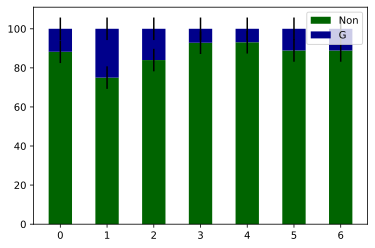

In [304]:


# # Create lists for each population
# G = df.loc['Expanding'][0:4]
# Non = df.loc['Committed'][0:4]
# Na = df.loc['Undetermined'][0:4]

# Calculate the total counts for each plate
totals = [sum(x) for x in zip(G, Non)]#, Na)]

# Calculate the percentage of each population for each plate
G_percent = [i / j * 100 for i, j in zip(G, totals)]
Non_percent = [i / j * 100 for i, j in zip(Non, totals)]
Na_percent = [i / j * 100 for i, j in zip(Na, totals)]

# Calculate the mean percentage for each population
G_mean = np.mean(G_percent)
Non_mean = np.mean(Non_percent)
Na_mean = np.mean(Na_percent)

# Calculate the standard deviation for each population
G_std = np.std(G_percent)
Non_std = np.std(Non_percent)
Na_std = np.std(Na_percent)

print(G_mean,G_std)
print(Non_mean,Non_std)
print(Na_mean,Na_std)

# Set up the figure and axis
fig, ax = plt.subplots()

# The x-axis positions for the bars
bar_positions = np.arange(len(Non_percent))

# Width of the bars
bar_width = 0.5

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR027/HighlyProliferative_replating.pdf'

with PdfPages(path_to_save) as pdf:

    # Plot the bars and error bars for each population
    ax.bar(bar_positions, Non_percent, width=bar_width, label='Non', yerr=Non_std,color = ["#006400"])
    #ax.bar(bar_positions, Na_mean, bottom=Non_mean, width=bar_width, label='NaN', yerr=Na_std)
    ax.bar(bar_positions, G_percent, bottom=np.add(Non_percent, 0), width=bar_width, label='G', yerr=G_std,color = ['#00008B'])

    # Customize the plot
    ax.set_xticks(bar_positions)
#     ax.set_xticklabels(['Experiments'])
#     ax.set_ylabel('Percentage')
#     ax.set_title('Stacked Bar Chart with G on Top')
    ax.legend()

    # Show the plot
    plt.show()
    pdf.savefig(fig)

9.34065934065934 2.197802197802198
90.65934065934066 2.197802197802204
9.835164835164836 5.54945054945055


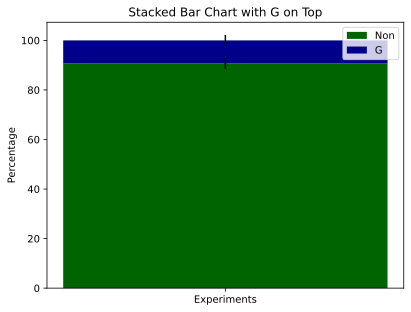

In [40]:
#Passaged once


# Create lists for each population
G = df.loc['Expanding'][3:5]
Non = df.loc['Committed'][3:5]
Na = df.loc['Undetermined'][3:5]

# Calculate the total counts for each plate
totals = [sum(x) for x in zip(G, Non)]#, Na)]

# Calculate the percentage of each population for each plate
G_percent = [i / j * 100 for i, j in zip(G, totals)]
Non_percent = [i / j * 100 for i, j in zip(Non, totals)]
Na_percent = [i / j * 100 for i, j in zip(Na, totals)]

# Calculate the mean percentage for each population
G_mean = np.mean(G_percent)
Non_mean = np.mean(Non_percent)
Na_mean = np.mean(Na_percent)

# Calculate the standard deviation for each population
G_std = np.std(G_percent)
Non_std = np.std(Non_percent)
Na_std = np.std(Na_percent)

print(G_mean,G_std)
print(Non_mean,Non_std)
print(Na_mean,Na_std)

# Set up the figure and axis
fig, ax = plt.subplots()

# The x-axis positions for the bars
bar_positions = np.arange(1)

# Width of the bars
bar_width = 0.5


path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_A_2.pdf'

with PdfPages(path_to_save) as pdf:
    
    # Plot the bars and error bars for each population
    ax.bar(bar_positions, Non_mean, width=bar_width, label='Non', yerr=Non_std,color = ["#006400"])
    #ax.bar(bar_positions, Na_mean, bottom=Non_mean, width=bar_width, label='NaN', yerr=Na_std)
    ax.bar(bar_positions, G_mean, bottom=np.add(Non_mean, 0), width=bar_width, label='G', yerr=G_std,color = ['#00008B'])

    # Customize the plot
    ax.set_xticks(bar_positions)
    ax.set_xticklabels(['Experiments'])
    ax.set_ylabel('Percentage')
    ax.set_title('Stacked Bar Chart with G on Top')
    ax.legend()

    # Show the plot
    plt.show()
    pdf.savefig(fig)


### 1B) Bar plot showing cell divisions per clone over time, with Expanding (blue) and Committed (green) cells.



In [2]:
#---------------------------------------------
#Load Data
#---------------------------------------------
print("Load data: ")
#put your path here
path_to_table =  '/Volumes/4TDATA_RAR/Projects/Proliferative_Senesent/Data/RAR014/Colony_count_quantified/FinalTable/'

#Get all mask files
all_txt_files = list(filter(lambda x: x.endswith('.txt'), os.listdir(path_to_table)))
all_txt_files = sorted(all_txt_files)

# set up iniitial df

df = pd.read_csv(path_to_table+all_txt_files[0], sep=",")
df['ID'] = 1
df['Day'] = 8
for i in range(1,len(all_txt_files)):
    
    if i < 4:
        day = 8
    elif i < 7:
        day = 2
    elif i < 11:
        day = 5
    elif i < 15:
        day = 11    
        
    df_hold = pd.read_csv(path_to_table+all_txt_files[i], sep=",")
    df_hold['ID'] = i+1
    df_hold['Day'] = day
    df = pd.concat([df,df_hold])
    
# Calculate any metric you want on the dataframe
df['Colony_area_per_number_of_cells'] = df.Colony_area/df.number_of_cells

print('Read ' + str(len(all_txt_files)) + ' files!')

Load data: 
Read 16 files!


In [3]:
# Add expanding and committed ID
df['ProliferationID'] = [0]*len(df["Day"])
for day in np.unique(df["Day"]):
    logic_d = df['number_of_cells'] > df[df["Day"] == day].quantile(.87)['number_of_cells']
    logic_d[df["Day"] != day] = False
    
    HOLD = df['ProliferationID']
    
    HOLD[logic_d] = 1

    df['ProliferationID'] = HOLD



<ipython-input-3-6ae6be2cc254>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOLD[logic_d] = 1
<ipython-input-3-6ae6be2cc254>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOLD[logic_d] = 1
<ipython-input-3-6ae6be2cc254>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOLD[logic_d] = 1
<ipython-input-3-6ae6be2cc254>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

In [4]:
df_all = pd.DataFrame() 

for i in np.unique(df.Day):
    
    df_hold = df.sort_values(by=['number_of_cells'], ascending=False)
    df_hold = df_hold[df_hold.Day == i]
    
    num_c = np.array(df_hold.number_of_cells)

    percent = 10
    

    r_per = len(num_c) % percent

    num_c = num_c[0:(len(num_c)-r_per)] # get rid of extra data (all ones)
    step = int(len(num_c)/percent)
    loop = int(len(num_c)/step)
    
    list_ = np.zeros(step*loop + r_per)
    label = np.zeros(step*loop + r_per)
    cnt = 0
    
    print("Number of Colonies= ", len(num_c)," Loop= ",loop," Step= ",step," %= ",percent)
    for l in range(0,(int(loop))):
        if len(num_c[step*l:step*(l+1)]) != 0:
            list_[cnt:(l+1)*step] = num_c[step*l:step*(l+1)]

            label[cnt:(l+1)*step] = np.ones(step)*(l+1)*(percent/4)
            cnt = (l+1)*step
    
    df_hold["Label"] = label
    df_all = pd.concat([df_all,df_hold])
df_all = df_all[df_all.Label > 0 ]


# Eponential to compare 
exp_days = np.arange(2,8,.1)
df_exp = pd.DataFrame(data = {'number_of_cells': 2**(exp_days), 'Day': np.unique(exp_days)}) 


df_all

Number of Colonies=  150  Loop=  10  Step=  15  %=  10
Number of Colonies=  200  Loop=  10  Step=  20  %=  10
Number of Colonies=  160  Loop=  10  Step=  16  %=  10
Number of Colonies=  220  Loop=  10  Step=  22  %=  10


unique_colonies   Colony_area  Colony_perimeter  number_of_cells  \
33               34  29339.745130       1017.471046                7   
17               18   2485.793040        197.960276                6   
11               12   2968.155029        239.608377                5   
33               34  61607.712082       1129.918498                5   
26               27   2114.373944        179.518857                5   
..              ...           ...               ...              ...   
46               47      0.000000          0.000000                1   
44               45      0.000000          0.000000                1   
48               49      0.000000          0.000000                1   
29               30      0.000000          0.000000                1   
32               33      0.000000          0.000000                1   

     dist_mean  dist_median    dist_std  nucleus_mean  nucleus_median  \
33  638.393632   671.825126   75.266527    422.714286           415.0   
17  321.890744   319.963657   30.129214    252.833333           236.5   
11  227.410327   234.361214   40.125412    580.400000           550.0   
33  389.128611   376.494248  145.310753    362.400000           303.0   
26  220.691574   231.867615   26.514868    246.800000           243.0   
..         ...          ...         ...           ...             ...   
46    0.000000     0.000000    0.000000    162.000000           162.0   
44    0.000000     0.000000    0.000000    412.000000           412.0   
48    0.000000     0.000000    0.000000    204.000000           204.0   
29    0.000000     0.000000    0.000000    265.000000           265.0   
32    0.000000     0.000000    0.000000     73.000000            73.0   

    nucleus_std  ID  Day  Colony_area_per_number_of_cells  ProliferationID  \
33    36.695660   6    2                      4191.392161                1   
17    57.669460   5    2                       414.298840                1   
11    78.989240   5    2                       593.631006                1   
33   108.232620   5    2                     12321.542416                1   
26    42.434656   6    2                       422.874789                1   
..          ...  ..  ...                              ...              ...   
46     0.000000  13   11                         0.000000                0   
44     0.000000  15   11                         0.000000                0   
48     0.000000  13   11                         0.000000                0   
29     0.000000  14   11                         0.000000                0   
32     0.000000  12   11                         0.000000                0   

    Label  
33    2.5  
17    2.5  
11    2.5  
33    2.5  
26    2.5  
..    ...  
46   25.0  
44   25.0  
48   25.0  
29   25.0  
32   25.0  

[730 rows x 15 columns]

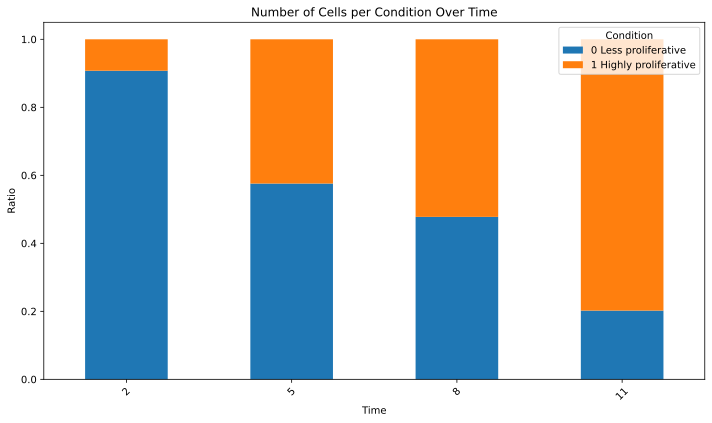

In [6]:
# Sample DataFrame structure
df = pd.DataFrame({
    'Time': df_all['Day'],
    'Condition': df_all['ProliferationID'],
    'CellCount': df_all['number_of_cells']
})

df['Condition'][df['Condition'] == 1] = '1 Highly proliferative'
df['Condition'][df['Condition'] == 0] = '0 Less proliferative'

# Assuming df is your DataFrame
pivot_df = df.pivot_table(index='Time', columns='Condition', values='CellCount', aggfunc='sum', fill_value=0)

# Normalize the cell counts by time point
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0)

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Number of Cells per Condition Over Time')
plt.xlabel('Time')
plt.ylabel('Ratio')
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.legend(title='Condition')
plt.tight_layout()


plt.savefig('/Users/raul/Desktop/96well_mask/stackedbarplot_norm.pdf')
plt.show()

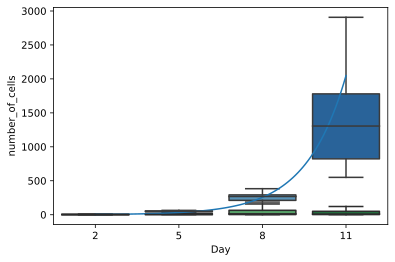

In [9]:
df_expanding = df_all[df_all.Label <= 4]

df_halt = df_all[df_all.Label > 4]

axis_y = 'number_of_cells' 
ax = sns.boxplot(x="Day", y =  axis_y, data=df_expanding, palette="Blues",showfliers=False)
ax = sns.boxplot(x="Day", y =  axis_y, data=df_halt, palette="Greens",showfliers=False)

t_plot = np.linspace(2, 11, 100)
plt.plot(np.linspace(0, 3, 100),2**t_plot)


path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_B_1.pdf'

#plt.savefig(path_to_save)

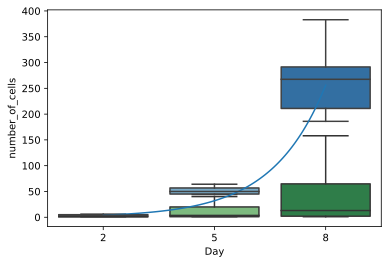

In [10]:
df_expanding = df_all[df_all.Label <= 4]
df_expanding = df_expanding[df_expanding.Day < 11]

df_halt = df_all[df_all.Label > 4]
df_halt = df_halt[df_halt.Day< 11]

axis_y = 'number_of_cells' 
ax = sns.boxplot(x="Day", y =  axis_y, data=df_expanding, palette="Blues",showfliers=False)
ax = sns.boxplot(x="Day", y =  axis_y, data=df_halt, palette="Greens",showfliers=False)

t_plot = np.linspace(2, 8, 100)
plt.plot(np.linspace(0, 2, 100),2**t_plot)


path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_B_2.pdf'

#plt.savefig(path_to_save)

### 1C) Cumulative distribution function (CDF) plot of the number of cell divisions per clone separated by days in culture. 




<AxesSubplot:xlabel='GrowthRate', ylabel='Proportion'>

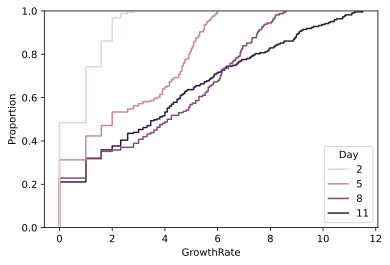

In [10]:
df_all = df[df.number_of_cells >0]
df_all['GrowthRate'] = np.log2(df_all.number_of_cells)
sns.ecdfplot(data=df_all, x="GrowthRate", hue="Day")


path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_C.pdf'

plt.savefig(path_to_save)

### 1D) Fit the model parameters to the data.



In [5]:
#put your path here
path_to_table = '/Volumes/4TDATA_RAR/Projects/Proliferative_Senesent/Data/RAR014/Colony_count_quantified/FinalTable/'

#Get all mask files
all_txt_files = list(filter(lambda x: x.endswith('.txt'), os.listdir(path_to_table)))
all_txt_files = sorted(all_txt_files)

# set up iniitial df
df = pd.read_csv(path_to_table+all_txt_files[0], sep=",")
df['ID'] = 1
df['Day'] = 8

print("Reading files:")
for i in range(1,len(all_txt_files)):
    
    if i < 4:
        day = 8
    elif i < 7:
        day = 2
    elif i < 11:
        day = 5
    elif i < 15:
        day = 11    
        
    df_hold = pd.read_csv(path_to_table+all_txt_files[i], sep=",")
    df_hold['ID'] = i+1
    df_hold['Day'] = day
    df = pd.concat([df,df_hold])
    
# Calculate any metric you want on the dataframe
df['Colony_area_per_number_of_cells'] = df.Colony_area/df.number_of_cells
df = df.sort_values(by=["Day"])
print('Read ' + str(len(all_txt_files)) + ' files!')

Reading files:
Read 16 files!


In [6]:
# Add expanding and committed ID
df['ProliferationID'] = [0]*len(df["Day"])
for day in np.unique(df["Day"]):
    logic_d = df['number_of_cells'] > df[df["Day"] == day].quantile(.90)['number_of_cells']
    logic_d[df["Day"] != day] = False
    
    HOLD = df['ProliferationID']
    
    HOLD[logic_d] = 1

    df['ProliferationID'] = HOLD


<ipython-input-6-31a65cf8378e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOLD[logic_d] = 1
<ipython-input-6-31a65cf8378e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOLD[logic_d] = 1
<ipython-input-6-31a65cf8378e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOLD[logic_d] = 1
<ipython-input-6-31a65cf8378e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in 

#### Fit data

One common approach is to minimize the sum of squared differences between the model predictions and the experimental data. This is known as least-squares fitting. You can use the scipy.optimize package to perform this optimization.

Here's an outline of the steps to perform the fitting:

    Define a cost function that computes the sum of squared differences between the model predictions and the experimental data for a given set of parameters.
    Use an optimization algorithm, like scipy.optimize.minimize, to find the parameter values that minimize the cost function.
    Evaluate the goodness of fit using statistical measures, like the coefficient of determination (R-squared) or the root-mean-square error (RMSE).

In [7]:

prolif_data = [ i for i in df['number_of_cells'][df['ProliferationID']==1] ] 

non_prolif_data = [ i for i in df['number_of_cells'][df['ProliferationID']==0] ] 

synthetic_data_combined = np.array(df['number_of_cells'])
t_synthetic_repeated = np.array(df["Day"])

# Initial conditions
y0 = [1, 1]  # Initial number of proliferating and non-proliferating cells

# Time vector
t = np.linspace(0, 10, 100)  # Time points from 0 to 100 with 100 points


# Define the ODE model
def two_state_system(y, t, k1, growth_rate):
    proliferating, non_proliferating = y
    
    dydt = [
        growth_rate * proliferating - k1 * proliferating ,  # Change in proliferating cells
        k1 * proliferating   # Change in non-proliferating cells
    ]
    return dydt


def cost_function_combined(params, t, combined_data):
    k1, growth_rate = params
    solution = odeint(two_state_system, y0, t, args=(k1, growth_rate))

    # Combine the model's populations into a single population
    combined_solution = np.sum(solution, axis=1)

    # Calculate the sum of squared differences
    ssd = np.sum((combined_solution - combined_data) ** 2)
    return ssd

# Initial conditions
y0 = [4, 1]  # Initial number of proliferating and non-proliferating cells

# Initial parameter values
initial_params = [0.2, 0.7]  # Initial values for k1, and growth_rate


# Optimize the parameters
result = minimize(cost_function_combined, initial_params, args=(t_synthetic_repeated, synthetic_data_combined), method='L-BFGS-B', bounds=[(0, None), (0, None)])

# Extract the best-fit parameters
k1_best, growth_rate_best = result.x


# Generate the best-fit solution
solution_best_fit = odeint(two_state_system, y0, t_synthetic_repeated, args=(k1_best, growth_rate_best))

# # Evaluate the goodness of fit using the R-squared value
# ssd_best_fit = np.sum((solution_best_fit - experimental_data) ** 2)
# sst = np.sum((experimental_data - np.mean(experimental_data, axis=0)) ** 2)
# r_squared = 1 - (ssd_best_fit / sst)

print("Best-fit parameters:")
print("k1:", k1_best)
print("Growth rate:", growth_rate_best)
#print("R-squared:", r_squared)

# Get the time points corresponding to proliferating and non-proliferating data
prolif_time_points = df['Day'][df['ProliferationID']==1] 
non_prolif_time_points = df['Day'][df['ProliferationID']==0] 


path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_D.pdf'

with PdfPages(path_to_save) as pdf:
    # Set up the figure and axis
    fig, ax = plt.subplots()
    # Plot the experimental data
    ax.scatter(prolif_time_points, np.log2(prolif_data), label='Proliferating data', c='b', marker='o', alpha=0.5)
    ax.scatter(non_prolif_time_points, np.log2(non_prolif_data), label='Non-proliferating data', c='g', marker='o', alpha=0.5)

    # Plot the best-fit model
    ax.plot(t_synthetic_repeated, np.log2(solution_best_fit[:, 0]), label='Proliferating best-fit', c='b', linestyle='-')
    ax.plot(t_synthetic_repeated, np.log2(solution_best_fit[:, 1]), label='Non-proliferating best-fit', c='g', linestyle='-')
    ax.plot(t_synthetic_repeated, np.log2(solution_best_fit[:, 0]+solution_best_fit[:, 1]), label='Total best-fit', c='k', linestyle='-')


    plt.xlabel('Time (days)')
    plt.ylabel('log2(Number of cells per colony)')
    plt.legend()
    plt.show()


    pdf.savefig(fig)



Best-fit parameters:
k1: 0.15392815873317375
Growth rate: 0.5468110491532072


NameError: name 'cwd' is not defined

### 1E) Gillespie stochastic simulation. 





#### Model

Correct order for stoichiometry matrix:

$${E \xrightarrow{ge} E + E \qquad E  \xrightarrow{keh} H   }$$

In [19]:
osc_N = np.array([[1,-1],  #E
                  [0, 1]]) #H

def osc_V_yc(y,ge,keh):
    return np.array([ge*y[0], keh*y[0]])

In [20]:

def Gillespie(N, V, y0, tlen):
#   N is the stoichiometry matrix
#   rate function V. function that gives us the propensities as a function of the current state.  
#     V is the k reactivities or the equiibrium associations. Note V(y) gives the matrix we are looking for when starting the beginning of the algorithm.
#   y0 is the initial condition/state vector.
#   tlen is max length of time. We will build up to this.
  
    t = 0.0 #starting time
    ts = [0.0]  #reporting array, to save information
    y = np.copy(y0) #using the given initial condition
    res = [list(y)]  #lists because these will be dynamically resizing bcs we will be randomly choosing our time intervals. We could pre-allocate these in a np.array to make more efficient. 

    while True: #just continuously looping until there is a break from within
        prop = V(y) #propensities
        a0 = sum(prop) #to see total propensity
        if a0 == 0:
            break
            
        dt =  random.expovariate(a0)#same thing as dt = np.random.exponential(1.0/a0)

        if t + dt > tlen: #if waiting time will exceed time limit
            break

        #picking with reaction to do 
        idx = random.choices(population=range(len(prop)),  #population is the indexes of these propensities
                             weights = prop,   #propensities
                             k=1) #we only want one value to be picked because every time we execute a reaction, the propensities change
        
        #Pulling out the columns from the stoich matrix for all the specifes with respect to that reaction
        change_to_apply = N[:,idx] #idx applied to the state vector
        #need to re shape because it comes out as a 2D array
        change_to_apply.shape = len(change_to_apply) #converting to 1D array

        #Adding the time
        t += dt
        #How the state is going to change
        y+= change_to_apply #this is a np.array

        #saving the time and results so that we can use it later
        ts.append(t)
        res.append(list(y))
        
    return(ts, np.array(res))


In [11]:
def plot_Gillespie(osc_N,osc_V,y0,times,runs,output_path):
    # initialize list
    plot_tf = []
    plot_Ef = []
    plot_Hf = []
    plot_all = []
    
    with PdfPages(output_path) as pdf:




        for t in times:
            tlen = t
            # Set up the figure and axis
            fig, ax = plt.subplots()
            for i in range(0,runs):

                (ts, res) = Gillespie(osc_N, osc_V, y0, tlen)

                #if abs(ts[-1] - 1)>3:
                plot_tf.append(ts[-1])
                plot_Ef.append(res[:,0][-1])
                plot_Hf.append(res[:,1][-1])
                plot_all.append(res[:,0][-1] + res[:,1][-1])

                ax.plot(ts, res[:,0]+ res[:,1],'b')

        plt.xlabel('Time')
        plt.ylabel('Number of cells per colony')
        titleStr = '#E0='+str(y0[0])+', #H0='+str(y0[1])
        plt.title(titleStr)  
        e = np.linspace(0,max(times),100)
        plt.plot(e,2**e,'k--')
        plt.legend(['E','H','Exponential'])
        plt.xlim([0,max(times)])
        

        pdf.savefig(fig)
        plt.show()
    
    return [plot_tf,plot_Ef,plot_Hf,plot_all]


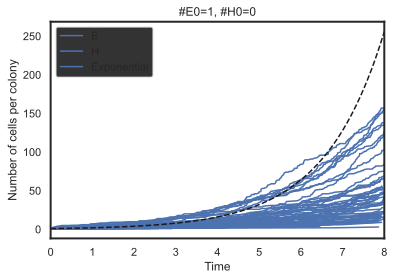

In [574]:
# variables
y0 = np.array([1,0]) #Start population size
times = [8] # time intervals to plot
runs = 100 # how many times to run

# Division rates
ge = .65#np.log(2) #doubling every day

# Diferentiation rates
keh = .3


osc_V = lambda y: osc_V_yc(y,ge,keh)

# initialize list
plot_tf = []
plot_Ef = []
plot_Hf = []
plot_all = []

G = plot_Gillespie(osc_N,osc_V,y0,times,runs,'/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/run100_day8.pdf')




In [12]:
def flatten(xss):
    return [x for xs in xss for x in xs]



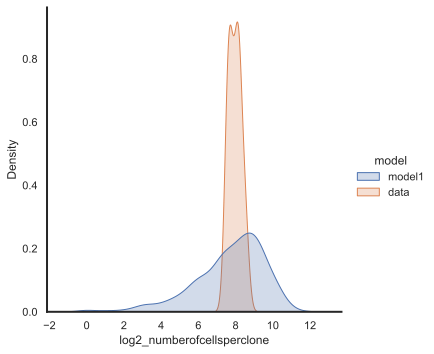

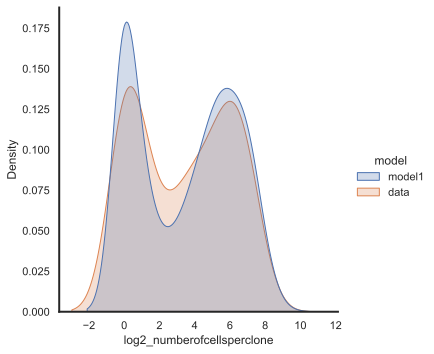

In [593]:

# variables
y0 = np.array([1,0]) #Start population size
times = [8] # time intervals to plot
runs = 1000 # how many times to run

# Division rates
ge = .75#np.log(2) #doubling every day

# Diferentiation rates
keh = 0


osc_V = lambda y: osc_V_yc(y,ge,keh)

# initialize list
plot_tf = []
plot_Ef = []
plot_Hf = []
plot_all = []



for t in times:
    tlen = t
    for i in range(0,runs):

        (ts, res) = Gillespie(osc_N, osc_V, y0, tlen)

        #if abs(ts[-1] - 1)>3:
        plot_tf.append(ts[-1])
        plot_Ef.append(res[:,0][-1])
        plot_Hf.append(res[:,1][-1])
        plot_all.append(res[:,0][-1] + res[:,1][-1])


hold = {'log2_numberofcellsperclone': flatten([np.log2(plot_all), np.log2(test_growth_Highly)]), 'model': flatten([len(plot_all)*['model1'], len(test_growth_Highly)*['data']])}
hold = pd.DataFrame(data=hold)
# g = sns.FacetGrid(hold,  row="model", hue="model", aspect=3, height=2)
# g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", fill=True, alpha=1)
# g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", color='black')
sns.displot(hold, x="log2_numberofcellsperclone", hue="model", kind="kde", fill=True,common_norm=False)
# sns.kdeplot(data=hold, x="log2_numberofcellsperclone", hue="model", multiple="stack",common_norm=False)
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, color='black', fontsize=13,
#             ha="left", va="center", transform=ax.transAxes)

# g.map(label, "model")
# g.fig.subplots_adjust(hspace=-.5)
# g.set_titles("")
# g.set(yticks=[], xlabel="log2_numberofcellsperclone")
# g.despine( left=True)
plt.savefig('/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Distribution/Highly_fit_75_0.pdf', bbox_inches='tight')




# variables
y0 = np.array([1,0]) #Start population size
times = [8] # time intervals to plot
runs = 1000 # how many times to run

# Division rates
ge = .7#np.log(2) #doubling every day

# Diferentiation rates
keh = .3


osc_V = lambda y: osc_V_yc(y,ge,keh)

# initialize list
plot_tf = []
plot_Ef = []
plot_Hf = []
plot_all = []



for t in times:
    tlen = t
    for i in range(0,runs):

        (ts, res) = Gillespie(osc_N, osc_V, y0, tlen)

        #if abs(ts[-1] - 1)>3:
        plot_tf.append(ts[-1])
        plot_Ef.append(res[:,0][-1])
        plot_Hf.append(res[:,1][-1])
        plot_all.append(res[:,0][-1] + res[:,1][-1])


hold = {'log2_numberofcellsperclone': flatten([np.log2(plot_all), np.log2(test_growth_Less)]), 'model': flatten([len(plot_all)*['model1'], len(test_growth_Less)*['data']])}
hold = pd.DataFrame(data=hold)
#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
sns.displot(hold, x="log2_numberofcellsperclone", hue="model", kind="kde", fill=True,common_norm=False)
# g = sns.FacetGrid(hold,  row="model", hue="model", aspect=3, height=2)
# g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", fill=True, alpha=1)
# g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", color='black')
# def label(x, color, label):
#     ax = plt.gca()
#     ax.text(0, .2, label, color='black', fontsize=13,
#             ha="left", va="center", transform=ax.transAxes)

# g.map(label, "model")
# g.fig.subplots_adjust(hspace=-.5)
# g.set_titles("")
# g.set(yticks=[], xlabel="log2_numberofcellsperclone")
# g.despine( left=True)
plt.savefig('/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Distribution/Less_fit_7_3.pdf', bbox_inches='tight')



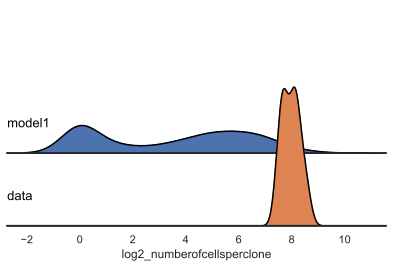

In [580]:
hold = {'log2_numberofcellsperclone': flatten([np.log2(plot_all), np.log2(test_growth_Highly)]), 'model': flatten([len(plot_all)*['model1'], len(test_growth_Highly)*['data']])}
hold = pd.DataFrame(data=hold)
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(hold,  row="model", hue="model", aspect=3, height=2)
g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "model")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="log2_numberofcellsperclone")
g.despine( left=True)

      log2_numberofcellsperclone   model
0                       0.000000  model1
1                       5.357552  model1
2                       0.000000  model1
3                       5.247928  model1
4                       5.727920  model1
...                          ...     ...
1195                    0.000000    data
1196                    0.000000    data
1197                    1.584963    data
1198                    2.584963    data
1199                    5.954196    data

[1200 rows x 2 columns]


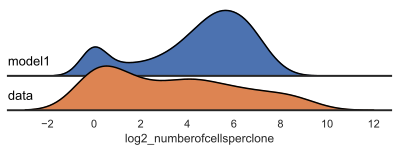

In [410]:
hold = {'log2_numberofcellsperclone': flatten([np.log2(plot_all), np.log2(test_growth_Less)]), 'model': flatten([len(plot_all)*['model1'], len(test_growth_Less)*['data']])}
hold = pd.DataFrame(data=hold)
print(hold)

#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(hold,  row="model", hue="model", aspect=5, height=1.2)
g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "model")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="log2_numberofcellsperclone")
g.despine( left=True)
#plt.suptitle('Model', y=0.98)

      log2_numberofcellsperclone   model
0                       1.000000  model1
1                       0.000000  model1
2                       4.000000  model1
3                       0.000000  model1
4                       0.000000  model1
...                          ...     ...
2018                    9.949827    data
2019                    9.098032    data
2020                    9.236014    data
2021                   10.518653    data
2022                   10.273796    data

[2023 rows x 2 columns]


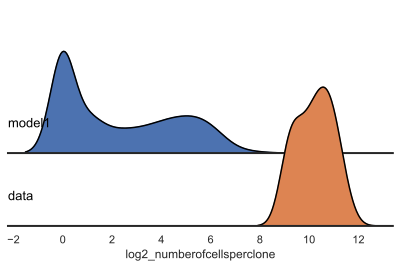

In [435]:
hold = {'log2_numberofcellsperclone': flatten([np.log2(plot_all), np.log2(test_growth_Highly)]), 'model': flatten([len(plot_all)*['model1'], len(test_growth_Highly)*['data']])}
hold = pd.DataFrame(data=hold)
print(hold)

#sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(hold,  row="model", hue="model", aspect=3, height=2)
g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="log2_numberofcellsperclone", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "model")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="log2_numberofcellsperclone")
g.despine( left=True)
#plt.suptitle('Model', y=0.98)

## Get correct timepoint from data

In [21]:
df_11 = df[df['Day']==8]

prolif_data = [ i for i in df_11['number_of_cells'][df_11['ProliferationID']==1] ] 

non_prolif_data = [ i for i in df_11['number_of_cells'][df_11['ProliferationID']==0] ] 

test_growth = np.array(df_11['number_of_cells'])
test_growth_Less = np.array(non_prolif_data) 
test_growth_Highly = np.array(prolif_data) 

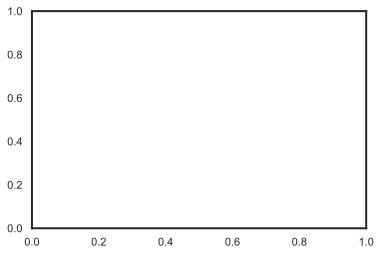

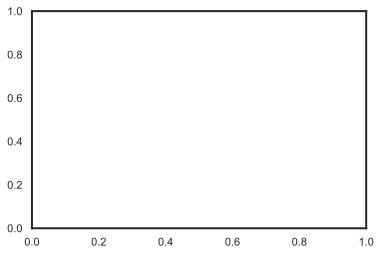

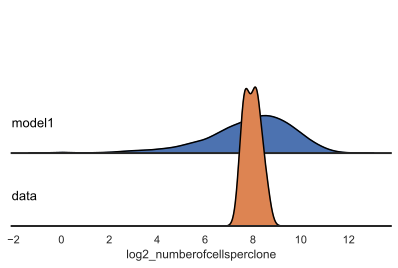

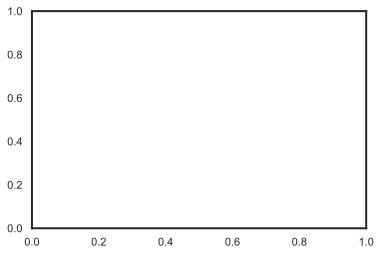

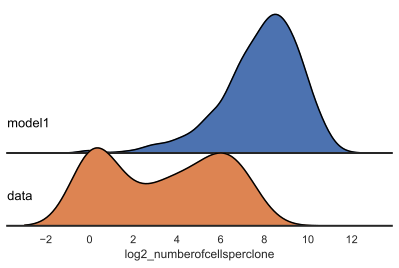

In [576]:
path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Distribution/Highly_fit_75.pdf'
#cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_E.pdf'

# variables
y0 = np.array([1,0]) #Start population size
times = [8] # time intervals to plot
runs = 1000 # how many times to run

# Division rates
ge = .75#np.log(2) #doubling every day

# Diferentiation rates
keh = 0


osc_V = lambda y: osc_V_yc(y,ge,keh)


[plot_tf,plot_Ef,plot_Hf,plot_all] = plot_Gillespie_vs_data(osc_N,osc_V,y0,times,runs,path_to_save)


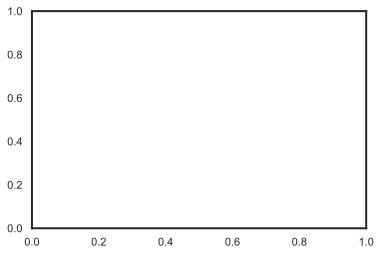

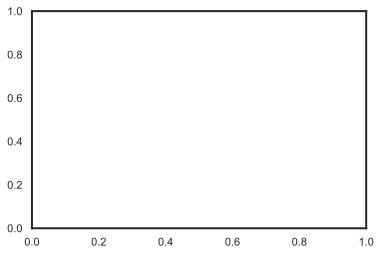

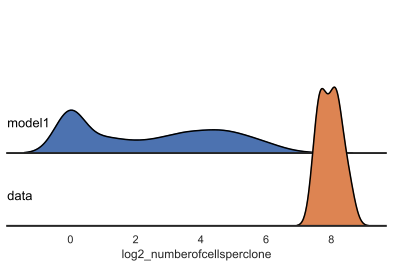

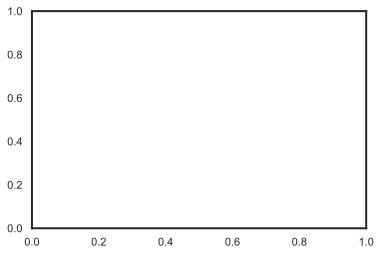

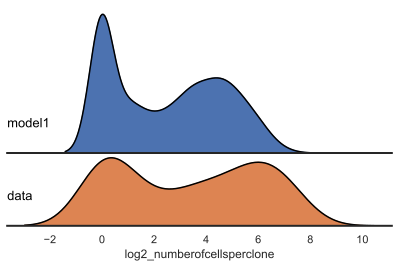

In [578]:
path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Distribution/Less_fit.pdf'
#cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_E.pdf'

# variables
y0 = np.array([1,0]) #Start population size
times = [8] # time intervals to plot
runs = 2000 # how many times to run

# Division rates
ge = .5 #np.log(2) #doubling every day

# Diferentiation rates
keh = .25


osc_V = lambda y: osc_V_yc(y,ge,keh)


[plot_tf,plot_Ef,plot_Hf,plot_all] = plot_Gillespie_vs_data(osc_N,osc_V,y0,times,runs,path_to_save)


### 1F) Parameter sweep.



In [22]:
def value_Gillespie(osc_N,osc_V,y0,times,runs):
    # initialize list
    plot_tf = []
    plot_Ef = []
    plot_Hf = []
    plot_all = []
    
    for t in times:
        tlen = t
        for i in range(0,runs):

            (ts, res) = Gillespie(osc_N, osc_V, y0, tlen)

            #if abs(ts[-1] - 1)>3:
            plot_tf.append(ts[-1])
            plot_Ef.append(res[:,0][-1])
            plot_Hf.append(res[:,1][-1])
            plot_all.append(res[:,0][-1] + res[:,1][-1])
            
    return [plot_tf,plot_Ef,plot_Hf,plot_all]


In [24]:
# prolif_data 
# non_prolif_data


times = [8]

# how corse or fine
step = 21
runs = 10 #len(test_growth)

# Diferentiation rates
keh = np.linspace(0,1,step) #np.linspace(0.5,10,step)

# Transition rates
ge = np.linspace(0,1,step)

# Arrays
Heat_total = np.zeros((step, step))
Heat_Ef = np.zeros((step, step))
Heat_Hf = np.zeros((step, step))

Heat_Kolmogorov = np.zeros((step, step))
Heat_Kolmogorov_p = np.zeros((step, step))

Heat_Kolmogorov_Less = np.zeros((step, step))
Heat_Kolmogorov_Less_p = np.zeros((step, step))

Heat_Kolmogorov_Highly = np.zeros((step, step))
Heat_Kolmogorov_Highly_p = np.zeros((step, step))

for i in range(0,step):

    for ii in range(0,step):
        
        osc_V = lambda y: osc_V_yc(y,ge[ii],keh[i])

        [plot_tf,plot_Ef,plot_Hf,plot_all] = value_Gillespie(osc_N,osc_V,y0,times,runs)
        Heat_total[i][ii] = np.mean(plot_all)
        Heat_Ef[i][ii] = np.mean(plot_Ef)
        Heat_Hf[i][ii] = np.mean(plot_Hf)
        
        simulated_growth = plot_all#[-runs-1:-1]
        
        # 3. Kolmogorov-Smirnov test
        ks_stat, ks_p_value = ks_2samp(simulated_growth, test_growth)
        Heat_Kolmogorov[i][ii] = ks_stat 
        Heat_Kolmogorov_p[i][ii] = ks_p_value
        
        # 3. Kolmogorov-Smirnov test Less proliferative
        ks_stat, ks_p_value = ks_2samp(simulated_growth, test_growth_Less)
        Heat_Kolmogorov_Less[i][ii] = ks_stat 
        Heat_Kolmogorov_Less_p[i][ii] = ks_p_value
        
        # 3. Kolmogorov-Smirnov test Highly proliferative
        ks_stat, ks_p_value = ks_2samp(simulated_growth, test_growth_Highly)
        Heat_Kolmogorov_Highly[i][ii] = ks_stat 
        Heat_Kolmogorov_Highly_p[i][ii] = ks_p_value
        
print('Done :)')

Done :)


In [542]:
# how corse or fine
step = 21
runs = 2000 #len(test_growth)

# Diferentiation rates
keh = np.linspace(0,1,step) #np.linspace(0.5,10,step)

# Transition rates
ge = np.linspace(0,1,step)

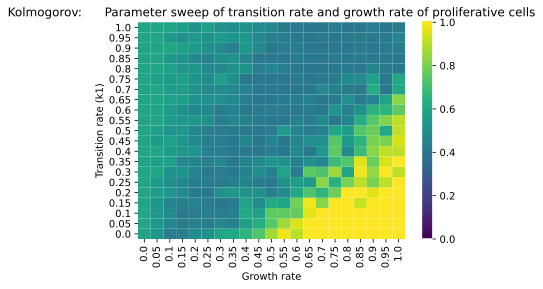

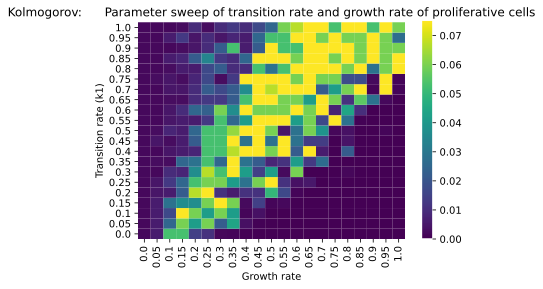

1.2196050390741335e-15


In [25]:
path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Lessproliferative_day8_2.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Less, cmap='viridis', xticklabels=np.round(keh, 2), yticklabels=np.round(ge, 2), vmin=0, vmax=1)
    ax.invert_yaxis()

    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    plt.show()

    pdf.savefig(fig)
    
path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Lessproliferative_p_day8_2.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Less_p, cmap='viridis', xticklabels=np.round(keh, 2), yticklabels=np.round(ge, 2))#, vmin=0, vmax=0.9)
    ax.invert_yaxis()

    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    plt.show()

    pdf.savefig(fig)    

print(np.min(Heat_Kolmogorov_Less_p))

In [537]:
print(np.min(Heat_Kolmogorov_Less)),print(np.max(Heat_Kolmogorov_Less_p))

0.048310344827586206
0.8942686371397192


(None, None)

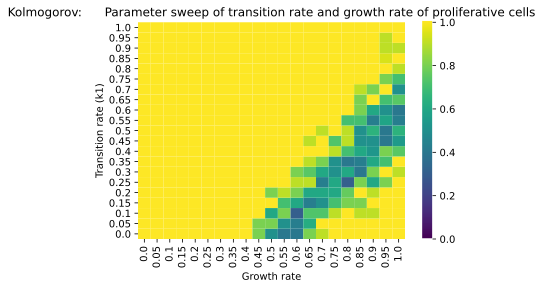

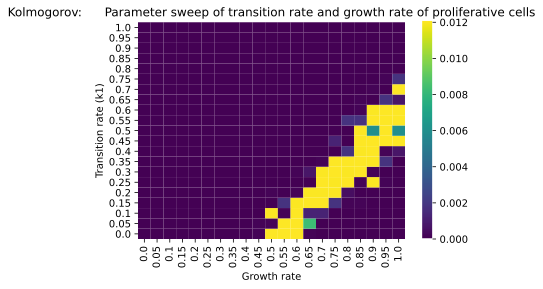

0.3


In [26]:
path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/highlyproliferative_day8_3.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Highly, cmap='viridis', xticklabels=np.round(keh, 2), yticklabels=np.round(ge, 2), vmin=0, vmax=1)


    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    ax.invert_yaxis()
    plt.show()

    pdf.savefig(fig)

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/highlyproliferative_p_day8_3.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Highly_p, cmap='viridis', xticklabels=np.round(keh, 2), yticklabels=np.round(ge, 2), vmin=0, vmax=0.012)


    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    ax.invert_yaxis()
    plt.show()

    pdf.savefig(fig)
    
print(np.min(Heat_Kolmogorov_Highly))

In [493]:
# Heat_Kolmogorov_Highly_zoom = Heat_Kolmogorov_Highly
# Heat_Kolmogorov_Highly_p_zoom = Heat_Kolmogorov_Highly_p

# Heat_Kolmogorov_Less_zoom = Heat_Kolmogorov_Less
# Heat_Kolmogorov_Less_p_zoom = Heat_Kolmogorov_Less_p

In [532]:
times = [8]

# how corse or fine
step = 11
runs = 2000 #len(test_growth)

# Diferentiation rates
keh = np.linspace(0,.4,step) #np.linspace(0.5,10,step)

# Transition rates
ge = np.linspace(.7,.9,step)

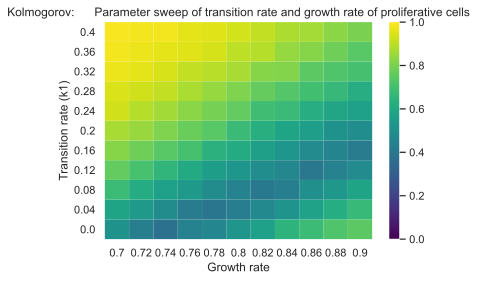

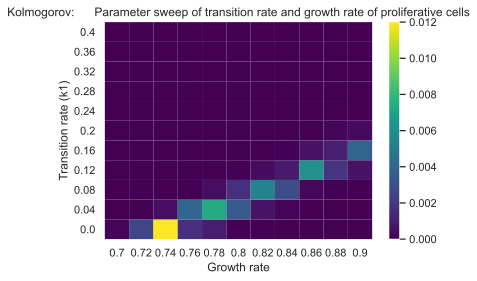

0.376


In [533]:
path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/highlyproliferative_day8_zoom_1.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Highly_zoom, cmap='viridis', xticklabels=np.round(ge, 2), yticklabels=np.round(keh, 2), vmin=0, vmax=1)


    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    ax.invert_yaxis()
    plt.show()

    pdf.savefig(fig)

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/highlyproliferative_p_day8_zoom_1.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Highly_p_zoom, cmap='viridis', xticklabels=np.round(ge, 2), yticklabels=np.round(keh, 2), vmin=0, vmax=0.012)


    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    ax.invert_yaxis()
    plt.show()

    pdf.savefig(fig)
    
print(np.min(Heat_Kolmogorov_Highly_zoom))

In [538]:
print(np.min(Heat_Kolmogorov_Highly)),print(np.max(Heat_Kolmogorov_Highly_p_zoom))


0.386
0.009042453594954586


(None, None)

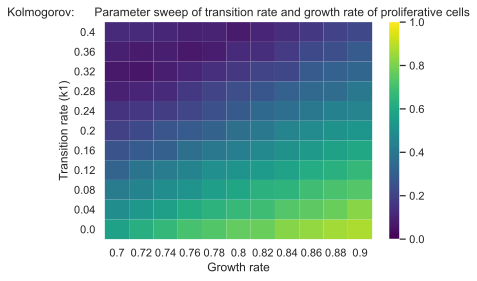

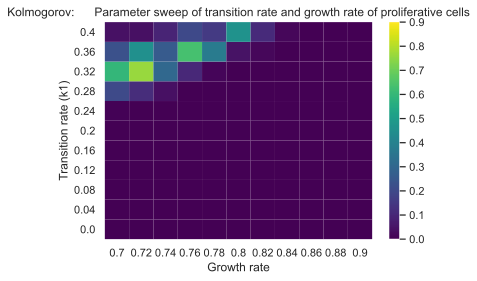

0.386


In [534]:
path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/lessproliferative_day8_zoom_1.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Less_zoom, cmap='viridis', xticklabels=np.round(ge, 2), yticklabels=np.round(keh, 2), vmin=0, vmax=1)


    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    ax.invert_yaxis()
    plt.show()

    pdf.savefig(fig)

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/lessproliferative_p_day8_zoom_1.pdf'


with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()
    sns.heatmap(Heat_Kolmogorov_Less_p_zoom, cmap='viridis', xticklabels=np.round(ge, 2), yticklabels=np.round(keh, 2), vmin=0, vmax=0.9)


    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
    ax.invert_yaxis()
    plt.show()

    pdf.savefig(fig)
    
print(np.min(Heat_Kolmogorov_Highly))

In [522]:
print(np.max(Heat_Kolmogorov_Less_p))

0.8942686371397192


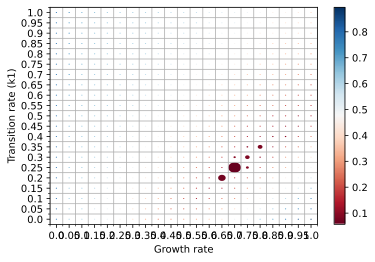

In [449]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

N = 21
M = 21
ylabels = np.round(ge, 2)
xlabels = np.round(keh, 2)

x, y = np.meshgrid(np.arange(len(Heat_Kolmogorov)), np.arange(len(Heat_Kolmogorov)))
s = Heat_Kolmogorov_p
c = Heat_Kolmogorov

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/combined_allproliferative_p_day8.pdf'

with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()

    #R = s/s.max()/2
    
    # Set a minimum radius value
    min_radius = 0.05  # Adjust this value as needed

    # Calculate normalized radii
    R = s/s.max()/2

    # Ensure that no radius is smaller than the minimum radius
    R = np.maximum(R, min_radius)
    
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="RdBu")
    ax.add_collection(col)

    ax.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    ax.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax.grid(which='minor')
    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    fig.colorbar(col)
    plt.show()
    pdf.savefig(fig)


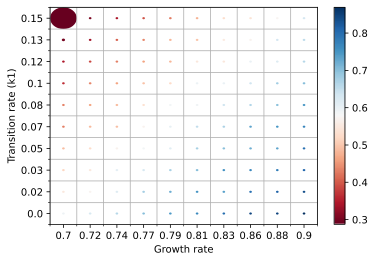

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

N = 10
M = 10
xlabels = np.round(ge, 2)
ylabels = np.round(keh, 2)

x, y = np.meshgrid(np.arange(len(Heat_Kolmogorov_Less)), np.arange(len(Heat_Kolmogorov_Less)))
s = Heat_Kolmogorov_Less_p
c = Heat_Kolmogorov_Less

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/combined_lessproliferative_p_day8_zoom.pdf'

with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()

    # Set a minimum radius value
    min_radius = 0.05  # Adjust this value as needed

    # Calculate normalized radii
    R = s/s.max()/2

    # Ensure that no radius is smaller than the minimum radius
    R = np.maximum(R, min_radius)
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="RdBu")
    ax.add_collection(col)

    ax.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    ax.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    ax.grid(which='minor')
    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    fig.colorbar(col)
    plt.show()
    pdf.savefig(fig)

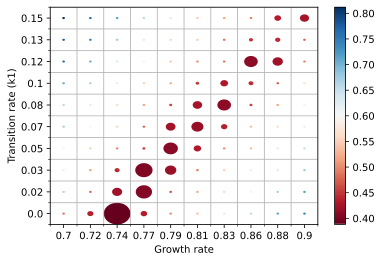

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

N = 10
M = 10
xlabels = np.round(ge, 2)#["".join(np.random.choice(list("PQRSTUVXYZ"), size=7)) for _ in range(N)]
ylabels = np.round(keh, 2)#["".join(np.random.choice(list("ABCDE"), size=3)) for _ in range(M)]


x, y = np.meshgrid(np.arange(len(Heat_Kolmogorov_Highly)), np.arange(len(Heat_Kolmogorov_Highly)))
s = Heat_Kolmogorov_Highly_p
c = Heat_Kolmogorov_Highly

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/combined_highlyproliferative_p_day8_zoom.pdf'

with PdfPages(path_to_save) as pdf:
    fig, ax = plt.subplots()

    # Set a minimum radius value
    min_radius = 0.05  # Adjust this value as needed

    # Calculate normalized radii
    R = s/s.max()/2

    # Ensure that no radius is smaller than the minimum radius
    R = np.maximum(R, min_radius)
    circles = [plt.Circle((j,i), radius=r) for r, j, i in zip(R.flat, x.flat, y.flat)]
    col = PatchCollection(circles, array=c.flatten(), cmap="RdBu")
    ax.add_collection(col)

    ax.set(xticks=np.arange(M), yticks=np.arange(N),
           xticklabels=xlabels, yticklabels=ylabels)
    ax.set_xticks(np.arange(M+1)-0.5, minor=True)
    ax.set_yticks(np.arange(N+1)-0.5, minor=True)
    plt.xlabel('Growth rate')
    plt.ylabel('Transition rate (k1)')
    ax.grid(which='minor')

    fig.colorbar(col)
    plt.show()
    pdf.savefig(fig)

# Try to change the gillipsie to include the decay growth rate

In [452]:
# def osc_V_yc(y,ge,keh):
#     ge_0 =  (1 - y[1] / ge) #max( ge*y[0]*(1  - y[0] / ge), 0) # max so ther is no negative growth
#     return np.array([ge_0 * y[0], keh * y[0]])

# def osc_V_yc(y,ge,keh):
#     gc = np.float64(max((ge-y[0]+y[1])/ge,0))
#     return np.array([gc*y[0] - keh*y[0], keh*y[0]])


def osc_V_yc(y,ge,keh,gc):
    gc = ge*np.float64(max((gc-(y[0]+y[1]))/gc,0))
    return np.array([gc*y[0], keh*y[0]])



In [453]:
# prolif_data 
# non_prolif_data


test_growth = np.array(df_11['number_of_cells'])
test_growth_Less = np.array(non_prolif_data) 
test_growth_Highly = np.array(prolif_data) 

times = [8]

# how corse or fine
step = 10
runs = 200 #len(test_growth)

# Diferentiation rates
keh = np.linspace(0,1,step) #np.linspace(0.5,10,step)

# Transition rates
ge = np.linspace(0,1,step)

gc = np.linspace(1,200,step)

# Arrays
Heat_total = np.zeros((step, step, step))
Heat_Ef = np.zeros((step, step, step))
Heat_Hf = np.zeros((step, step, step))

Heat_Kolmogorov = np.zeros((step, step, step))
Heat_Kolmogorov_p = np.zeros((step, step, step))

Heat_Kolmogorov_Less = np.zeros((step, step, step))
Heat_Kolmogorov_Less_p = np.zeros((step, step, step))

Heat_Kolmogorov_Highly = np.zeros((step, step, step))
Heat_Kolmogorov_Highly_p = np.zeros((step, step, step))

for i in range(0,step):

    for ii in range(0,step):
        
        for j in range(0,step):
        
            osc_V = lambda y: osc_V_yc(y,ge[ii],keh[i],gc[j])

            [plot_tf,plot_Ef,plot_Hf,plot_all] = value_Gillespie(osc_N,osc_V,y0,times,runs)
            Heat_total[i][ii][j] = np.mean(plot_all)
            Heat_Ef[i][ii][j] = np.mean(plot_Ef)
            Heat_Hf[i][ii][j] = np.mean(plot_Hf)

            simulated_growth = plot_all#[-runs-1:-1]

            # 3. Kolmogorov-Smirnov test
            ks_stat, ks_p_value = ks_2samp(simulated_growth, test_growth)
            Heat_Kolmogorov[i][ii][j] = ks_stat 
            Heat_Kolmogorov_p[i][ii][j] = ks_p_value

            # 3. Kolmogorov-Smirnov test Less proliferative
            ks_stat, ks_p_value = ks_2samp(simulated_growth, test_growth_Less)
            Heat_Kolmogorov_Less[i][ii][j] = ks_stat 
            Heat_Kolmogorov_Less_p[i][ii][j] = ks_p_value

            # 3. Kolmogorov-Smirnov test Highly proliferative
            ks_stat, ks_p_value = ks_2samp(simulated_growth, test_growth_Highly)
            Heat_Kolmogorov_Highly[i][ii][j] = ks_stat 
            Heat_Kolmogorov_Highly_p[i][ii][j] = ks_p_value
        
print('Done :)')

Done :)


In [391]:
A = np.random.rand(2, 3, 4)
A[0]

array([[0.09466832, 0.77713864, 0.90169098, 0.82538828],
       [0.47676529, 0.82514779, 0.07562909, 0.25422661],
       [0.8668669 , 0.04138781, 0.39805402, 0.86046989]])

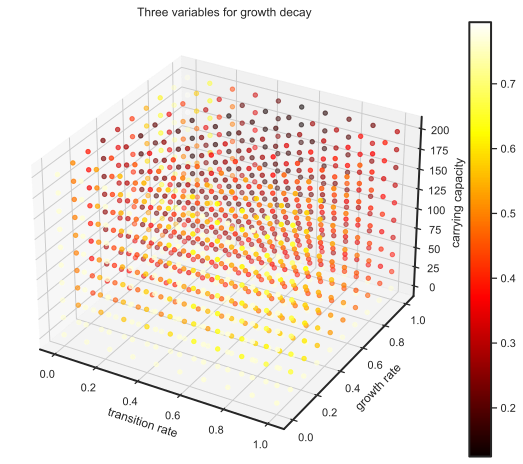

In [463]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generating a sample 3D matrix (10x10x10) with random values
matrix_size = 10
matrix = Heat_Kolmogorov_Less

# Preparing data for plotting
x, y, z, values = [], [], [], []
for i in range(matrix_size):
    for j in range(matrix_size):
        for k in range(matrix_size):
            x.append(keh[i])
            y.append(ge[j])
            z.append(gc[k])
            values.append(matrix[i, j, k])

# Creating the 3D heatmap
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

img = ax.scatter(x, y, z, c=values, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('transition rate')
ax.set_ylabel('growth rate')
ax.set_zlabel('carrying capacity')

plt.title('Three variables for growth decay')
plt.show()


In [399]:
%matplotlib inline

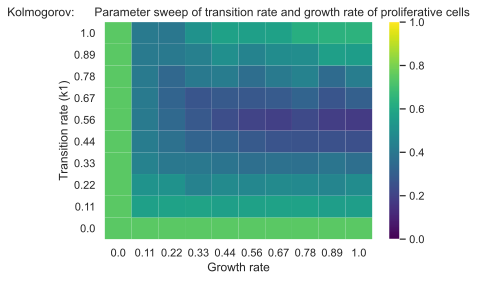

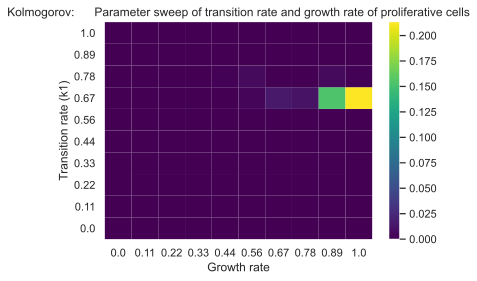

In [395]:
fig, ax = plt.subplots()
sns.heatmap(Heat_Kolmogorov_Less[1], cmap='viridis', xticklabels=np.round(ge, 2), yticklabels=np.round(keh, 2), vmin=0, vmax=1)
ax.invert_yaxis()

plt.xlabel('Growth rate')
plt.ylabel('Transition rate (k1)')
plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
plt.show()


fig, ax = plt.subplots()
sns.heatmap(Heat_Kolmogorov_Less_p[2], cmap='viridis', xticklabels=np.round(ge, 2), yticklabels=np.round(keh, 2) )
ax.invert_yaxis()

plt.xlabel('Growth rate')
plt.ylabel('Transition rate (k1)')
plt.title('Kolmogorov'+':      Parameter sweep of transition rate and growth rate of proliferative cells')
plt.show()


In [ ]:
# Look at the distributions

<ipython-input-213-e9ac78f862f6>:37: UserWarning: Attempting to set identical left == right == 8 results in singular transformations; automatically expanding.
  plt.xlim([min(times),max(times)])


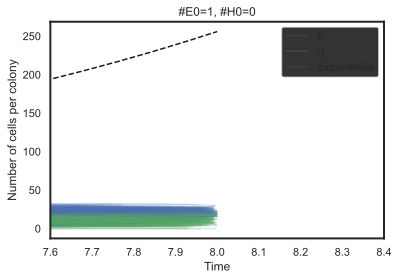

In [314]:
path_to_save = '/Users/raul/Desktop/test_distribution.pdf'

# variables
y0 = np.array([1,0]) #Start population size
times = [8] # time intervals to plot
runs = 1000 # how many times to run

# Division rates
ge = 40 #doubling every day

# Diferentiation rates
keh = 0.15


osc_V = lambda y: osc_V_yc(y,ge,keh)


[plot_tf,plot_Ef,plot_Hf,plot_all] = plot_Gillespie(osc_N,osc_V,y0,times,runs,path_to_save)


In [529]:
# 3. Kolmogorov-Smirnov test
test_growth

# 3. Kolmogorov-Smirnov test Less proliferative
test_growth_Less

# 3. Kolmogorov-Smirnov test Highly proliferative
test_growth_Highly

array([271, 218, 264, 383, 323, 192, 186, 234, 291, 213, 183, 204, 285,
       205, 293, 359, 274])

In [ ]:
plot_all

### 1H) Data fitted by their respective growth rate models.

In [245]:
synthetic_data_combined = np.array(df['number_of_cells'])
t_synthetic_repeated = np.array(df["Day"])


synthetic_data_combined = np.array([ i for i in df['number_of_cells'][df['ProliferationID']==1] ]) 
t_synthetic_repeated= np.array([ i for i in df['Day'][df['ProliferationID']==1] ] )

In [246]:
from scipy.optimize import curve_fit
# Function to calculate the power-law with constants a and b

# f = a * x^b    => $$P_t = P_o * \lambda^t $$

def power_law(x, a, b):
    return a*np.power(b, x)

[1.844155844155844, 10.48936170212766, 36.8, 58.125]
Fit parameters and standard deviations:

    Po = 4.331 - 2.550
lambda = 1.270 - 0.073


Division rate:

    ln(mean(data_lambda)) = 1.845
ln(mean(expo_lambda_exp)) = 3.000

STD
ln(mean(std_data_lambda)) = 0.747


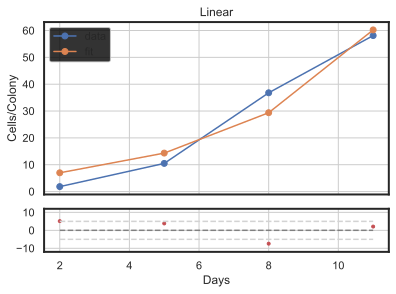

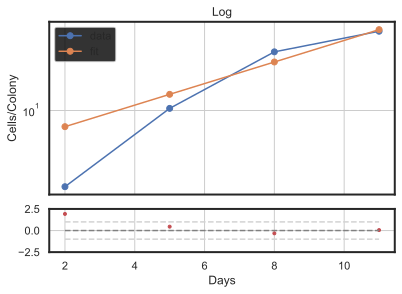

In [248]:

df_expanding = df[df['ProliferationID']==0]

# Data to fit
days = np.unique(df_expanding["Day"])
day_col_mean    = [np.mean(df_expanding['number_of_cells'][df_expanding['Day'] == i]) for i in np.unique(df_expanding['Day'])]


print(day_col_mean )
# Fit data
pars, cov = curve_fit(f=power_law, xdata=days, ydata=day_col_mean, p0=[1, 1.5], bounds=(-np.inf, np.inf))

# Get the standard deviations of the parameters (square roots of the diagonal of the covariance)
stdevs = np.sqrt(np.diag(cov))


# Calculate the residuals
res = day_col_mean - power_law(days, *pars)

print("Fit parameters and standard deviations:")
print("")
print('    Po = {:0.3f} - {:0.3f}'.format(pars[0], stdevs[0]))
print('lambda = {:0.3f} - {:0.3f}'.format(pars[1], stdevs[1]))
print("")

#Division rates
div_rate = [day_col_mean[i]/day_col_mean[i-1] for i in range(1,len(day_col_mean))]


exp_mod = 2**days
div_rate_exp = [exp_mod[i]/exp_mod[i-1] for i in range(1,len(exp_mod))]

print("")
print("Division rate:")
print("")
print('    ln(mean(data_lambda)) = {:0.3f}' .format(np.log2(np.mean(div_rate))))

print('ln(mean(expo_lambda_exp)) = {:0.3f}' .format(np.log2(np.mean(div_rate_exp))))
print("")
print("STD")
print('ln(mean(std_data_lambda)) = {:0.3f}'.format(np.log2(np.std(div_rate))))


#PLOT
fig1 = plt.figure(1)

#Plot Data-model
frame1=fig1.add_axes((.1,.3,.8,.6))
plt.plot(days,day_col_mean,'-o')
plt.plot(days,power_law(days, *pars),'-o')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.ylabel('Cells/Colony')
plt.title("Linear")
plt.legend(["data","fit"])
plt.grid()

#Residual plot
difference = power_law(days, *pars) - day_col_mean
frame2=fig1.add_axes((.1,.1,.8,.15))        
plt.plot(days,difference,'.r')
plt.plot(days,days*0,'--',color = "gray")
plt.plot(days,days*0 + [5,5,5,5],'--',color = "lightgray")
plt.plot(days,days*0 + [-5,-5,-5,-5],'--',color = "lightgray")
plt.xlabel('Days')
plt.grid()
plt.ylim(-12,12)
#plt.savefig(outDir + "Model_fit.pdf")
#plt.savefig(path_to_plot + "expanding_fit.pdf")

fig2 = plt.figure(2)
#Log
frame1=fig2.add_axes((.1,.3,.8,.6))
plt.plot(days,day_col_mean,'-o')
plt.plot(days,power_law(days, *pars),'-o')
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.yscale("log")
plt.ylabel('Cells/Colony')
plt.legend(["data","fit"])
plt.title("Log")
plt.grid()

#Residual plot
difference = np.log2(power_law(days, *pars)) - np.log2(day_col_mean)
frame2=fig2.add_axes((.1,.1,.8,.15))        
plt.plot(days,difference,'.r')
plt.plot(days,days*0,'--',color = "gray")
plt.plot(days,days*0 + [1,1,1,1],'--',color = "lightgray")
plt.plot(days,days*0 + [-1,-1,-1,-1],'--',color = "lightgray")
plt.xlabel('Days')
plt.ylim(-2.5,2.5)
plt.grid()

# path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_H1.pdf'
# plt.savefig(path_to_save)


In [309]:
# Example data - replace with your actual data
observed_data = [np.random.normal(loc=0, scale=1, size=100) for _ in range(5)]  # 5 time points
theoretical_fit = [np.random.normal(loc=0, scale=1, size=100) for _ in range(5)]  # Corresponding theoretical fit


ks_results = []

for obs_data, fit_data in zip(observed_data, theoretical_fit):
    ks_stat, p_value = ks_2samp(obs_data, fit_data)
    ks_results.append((ks_stat, p_value))
    

for i, (ks_stat, p_value) in enumerate(ks_results):
    print(f"Time Point {i+1}: KS Statistic = {ks_stat}, P-value = {p_value}")

Time Point 1: KS Statistic = 0.15, P-value = 0.21117008625127576
Time Point 2: KS Statistic = 0.11, P-value = 0.5830090612540064
Time Point 3: KS Statistic = 0.2, P-value = 0.03638428787491733
Time Point 4: KS Statistic = 0.11, P-value = 0.5830090612540064
Time Point 5: KS Statistic = 0.08, P-value = 0.9084105017744525


# Time dependant growth rate
$${E \xrightarrow{g(t)} E + E \qquad E  \xrightarrow{k} H  }$$

E = expanding cells 

H = Non-expanding cells

g(t) = time dependant growth rate 

k = differentiation rate 



$${g(t) = C1 - C1(1 - \frac{1}{1+t}) \qquad \qquad k = C2} $$

C1 = constant  
C2 = constant 

In [320]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

expanding [ 1.84415584 10.4893617  36.8        58.125     ]
-0.15235490447048977 22.6801891841892 0.13089124744799624


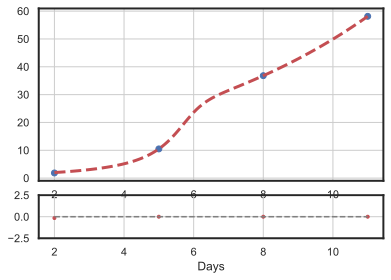

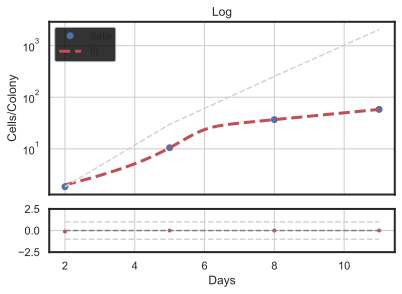

In [552]:
df_halt = df[df['ProliferationID']==0]


#"""Experimental data!"""
t_exp = np.unique(np.array(df_all.Day) )

S_exp =[]
S_std =[]
for t in t_exp:
    S_exp.append(np.mean(df_halt.number_of_cells[df_halt.Day == t]))
    S_std.append(np.mean(df_halt.number_of_cells[df_halt.Day == t]))


print("expanding",np.unique(S_exp))

# SETTING UP THE MODEL
 
def f(t, c1,c2,g):
    
    #'Function that returns mutually dependent variables C' and H'
    def growth(x, t):

        C = x[0]
        H = x[1]
        

        gc = g*(C+H)*(1 - (C+H)/c2)#g*(c2 - (C+H))/c2
        k1 = c1 
        
        

        dCdt = gc*C - k1*C 
        dHdt = k1*C
        
        return  [dCdt,dHdt]
    
    # INTEGRATING THE DIFFERENTIAL EQUATIONS
    #"initial Conditions"
    init = [2,0]#[2.6,0]
    results = odeint(growth, init, t)
    #"Taking out desired column vectors from results array"
    return results[:,0]

# CURVE FITTING AND PARAMETER ESTIMATION
c1 = .5
c2 = 50
g = .9

k, kcov = curve_fit(f, t_exp, S_exp, p0=( c1,c2,g))

c1 = k[0]
c2 = k[1]
g = k[2]
print(c1,c2,g)


# RESULTS OF THE MODEL WITH THE ESTIMATED MODEL PARAMETERS
t_mod = np.linspace(2, 11, 120)


compute = f(t_mod, c1,c2,g)
# compute = compute.reshape((2,-1))

S_mod = compute



# PLOT OF THE MODEL AND THE OBSERVED DATA
fig = plt.figure(1)
frame1=fig.add_axes((.1,.3,.8,.6))
plt.plot(t_exp, S_exp, "o", )
plt.plot(t_mod, S_mod, "r--", linewidth=3)
#plt.set_ylabel("Halt", color="r")
plt.grid()

t_mod_r = np.linspace(2, 11, 4)


compute = f(t_mod_r, c1,c2,g)
S_mod_r = compute

#Residual plot
difference = S_exp - S_mod_r
frame2=fig.add_axes((.1,.1,.8,.15))              
plt.plot(days,difference,'.r')
plt.plot(days,days*0,'--',color = "gray")
plt.plot(days,days*0 + [5,5,5,5],'--',color = "lightgray")
plt.plot(days,days*0 + [-5,-5,-5,-5],'--',color = "lightgray")
plt.xlabel('Days')
plt.ylim(-2.5,2.5)
plt.grid()



#plt.savefig(path_to_plot + "halt_fit_time_growth_rate.pdf")




fig2 = plt.figure(2)
#Log
frame1=fig2.add_axes((.1,.3,.8,.6))
plt.plot(t_exp, S_exp, "o", )
plt.plot(t_mod, S_mod, "r--", linewidth=3)
plt.plot(days,2**days - 2**2 + S_exp[0],'--',color = "lightgray")


#ax2.set_ylabel("Halt", color="r")
frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
plt.yscale("log")#, basey=2)
plt.ylabel('Cells/Colony')
plt.legend(["data","fit"])
plt.title("Log")
plt.grid()

#Residual plot
difference = np.log2(S_exp) - np.log2(S_mod_r)
frame2=fig2.add_axes((.1,.1,.8,.15))        
plt.plot(days,difference,'.r')
plt.plot(days,days*0,'--',color = "gray")
plt.plot(days,days*0 + [1,1,1,1],'--',color = "lightgray")
plt.plot(days,days*0 + [-1,-1,-1,-1],'--',color = "lightgray")
plt.xlabel('Days')
plt.ylim(-2.5,2.5)
plt.grid()


# path_to_save = cwd + 'Paper/outputs/figures/supplement_figure1/supplement_figure1_H2.pdf'
# plt.savefig(path_to_save)

In [553]:
c2,c1,g

(22.6801891841892, -0.15235490447048977, 0.13089124744799624)

In [551]:
c2

126.19013763701588

In [552]:
c1

0.1575567023643978

In [553]:
g

0.7460807230776135

In [523]:
k

array([ 0.12425026, 40.15404195,  0.9       ])

In [467]:
hold = {'growthrate': [1,.87,.74, .74,.35,.85,.75,.5], 'transitionrate': [0,0,0,0,0,.6,.3,.25], 'ID': ['Highly','Highly','Highly','Highly','Less','Less','Less','Less']}
hold = pd.DataFrame(data=hold)

(-0.1, 1.0)

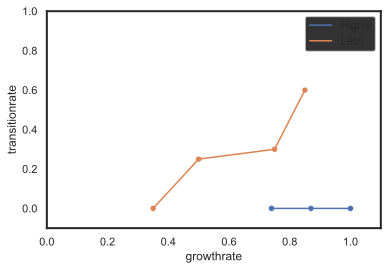

In [477]:
sns.lineplot(data=hold, x='growthrate', y='transitionrate', hue='ID')
sns.scatterplot(data=hold, x='growthrate', y='transitionrate', hue='ID')
plt.legend(["Highly","Less"])
plt.xlim((0, 1.1)) 
plt.ylim((-0.1, 1)) 

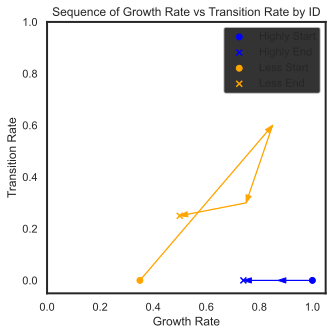

In [551]:
# Plotting with two sets of arrows for each ID
plt.figure(figsize=(5, 5))

# Separate data by ID
highly_data = hold_df[hold_df['ID'] == 'Highly']
less_data = hold_df[hold_df['ID'] == 'Less']

# Function to plot arrows for a subset of data
def plot_arrows(data, color, label):
    x_start, y_start = data.iloc[0]['growthrate'], data.iloc[0]['transitionrate']
    for index in range(1, len(data)):
        x_end, y_end = data.iloc[index]['growthrate'], data.iloc[index]['transitionrate']
        plt.arrow(x_start, y_start, x_end - x_start, y_end - y_start, 
                  length_includes_head=True, head_width=0.02, head_length=0.03, 
                  fc=color, ec=color)
        x_start, y_start = x_end, y_end
    # Adding the first and last point markers
    plt.scatter(data.iloc[0]['growthrate'], data.iloc[0]['transitionrate'], color=color, label=f'{label} Start')
    plt.scatter(data.iloc[-1]['growthrate'], data.iloc[-1]['transitionrate'], color=color, marker='x', label=f'{label} End')

# Plot arrows for each set of data
plot_arrows(highly_data, 'blue', 'Highly')
plot_arrows(less_data, 'orange', 'Less')

plt.xlabel('Growth Rate')
plt.ylabel('Transition Rate')
plt.title('Sequence of Growth Rate vs Transition Rate by ID')
plt.legend()
plt.ylim((-0.05, 1)) 
plt.xlim((0, 1.05)) 

path_to_save = '/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/all_final_values.pdf'
plt.savefig(path_to_save)

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the decaying growth rate model
r_decay = -0.1  # Decay rate (negative value indicates decay)
N_0 = 100       # Initial population size
time = np.linspace(0, 50, 1000)  # Time range for the simulation (0 to 50 units)

# Decaying growth rate model function
def decaying_growth_rate(N_0, r_decay, time):
    return N_0 * np.exp(r_decay * time)

# Calculating population size over time
population = decaying_growth_rate(N_0, r_decay, time)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, population, label='Decaying Growth Rate')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Decaying Growth Rate Model')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

image = cv2.imread('/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Lessproliferative_p_day8_1.png', 0)
colormap = plt.get_cmap('inferno')
heatmap = (colormap(image) * 2**16).astype(np.uint16)[:,:,:3]
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_RGB2BGR)

cv2.imwrite('/Volumes/GoogleDrive-101945757574252901453/My Drive/Hueros_Shared/Paper/data/processed/RAR014/model/Gilipsie/Lessproliferative_p_day8_1_inferno.png', heatmap )




True

In [30]:
cv2.imshow('image', image)

error: OpenCV(4.5.3) /private/var/folders/24/8k48jl6d249_n_qfxwsl6xvm0000gn/T/pip-req-build-xxsyexfp/opencv/modules/highgui/src/window.cpp:1006: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'


In [ ]:
cv2.destroyAllWindows()